In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json
from Bio import SeqIO
import scipy.stats

In [2]:
nonzero_genes = ["ORF8b", "N", "ORF5", "ORF4b", "ORF3", "S2", "S1", "Hel", "RdRp", "Nsp5", "Nsp4", "Nsp3"]

In [3]:
def collect_data(gene):
    Africa_file = "adaptation_results/results/mersAfrica_" + str(gene) + "_3_3_9_False_adaptation.json"
    with open(Africa_file, 'r') as f:
        Africa_data = json.load(f)    
    x = Africa_data["window_midpoint"]
    y = Africa_data["adaptive_substitutions_per_codon"]
    return x, y

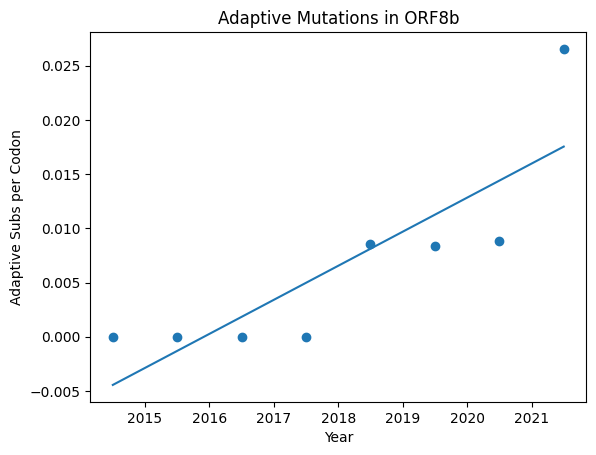

rate: 0.0031407535925533337


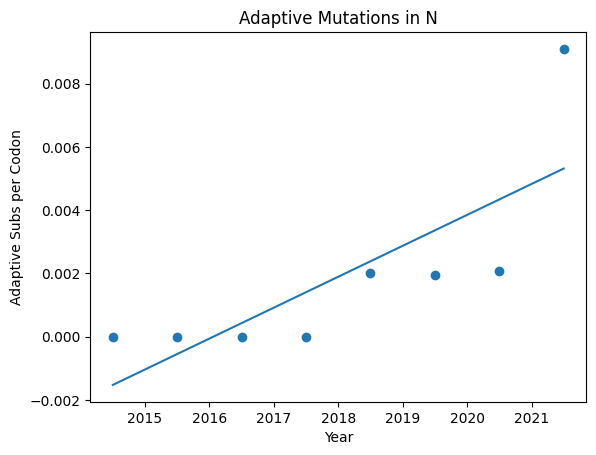

rate: 0.0009766621744020194


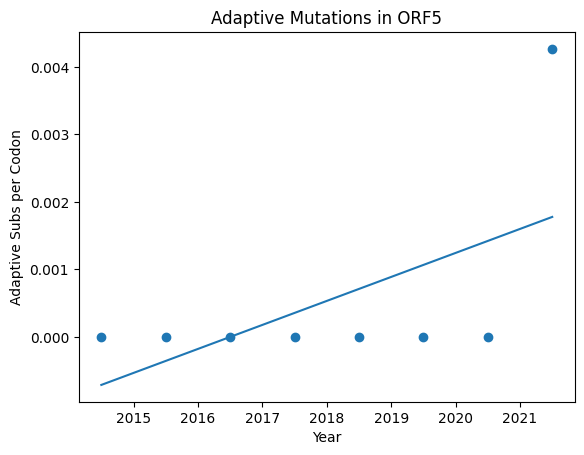

rate: 0.0003556678891201639


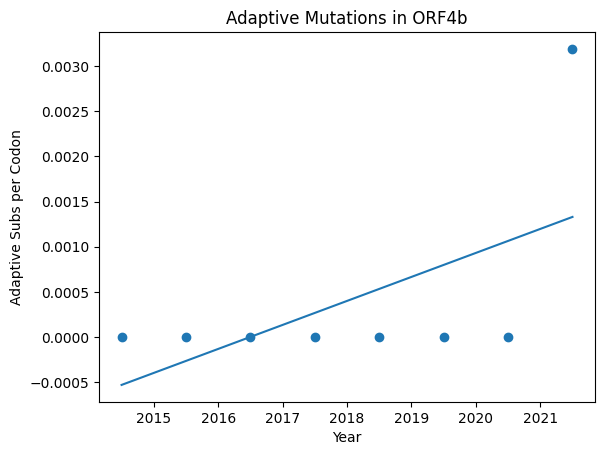

rate: 0.0002659194711751757


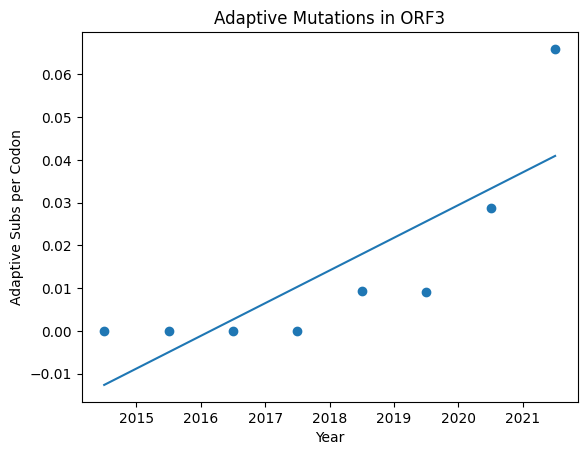

rate: 0.007648062439873121


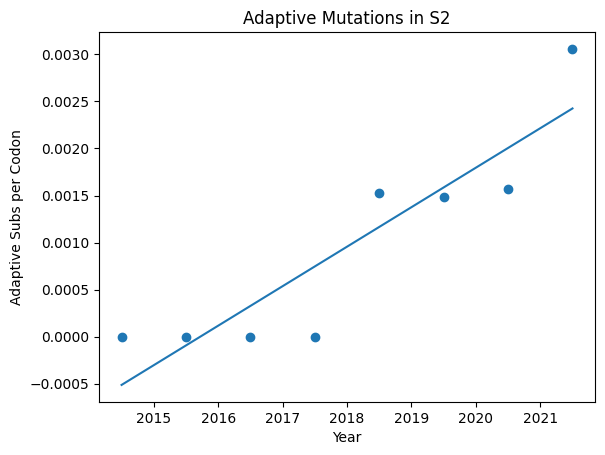

rate: 0.0004198199811776846


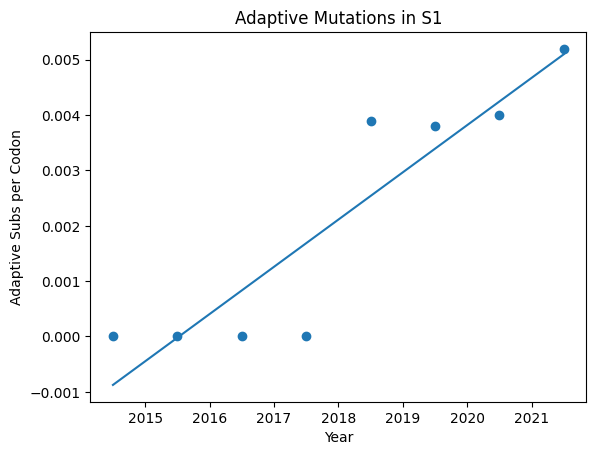

rate: 0.0008536992219610875


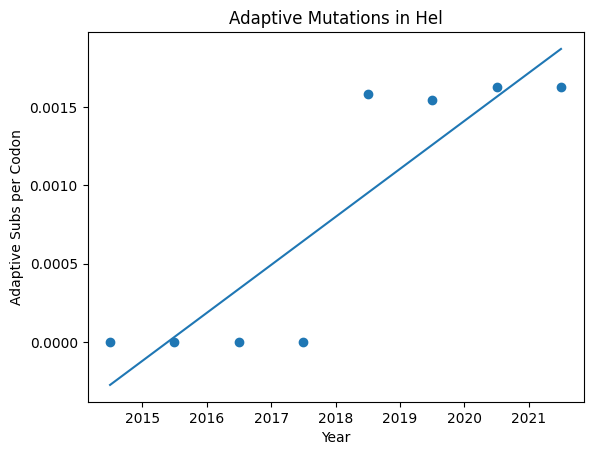

rate: 0.000306474442583205


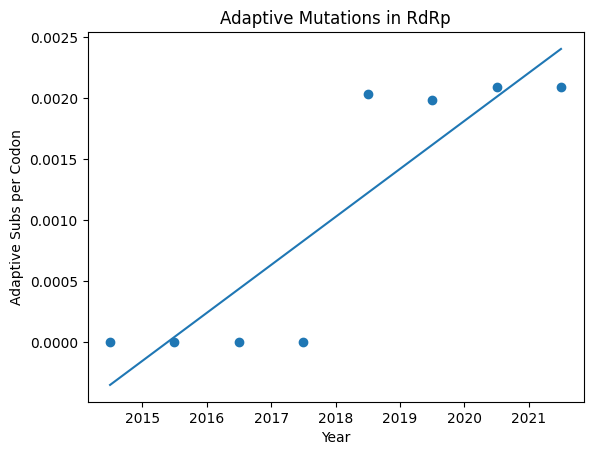

rate: 0.00039390235119385705


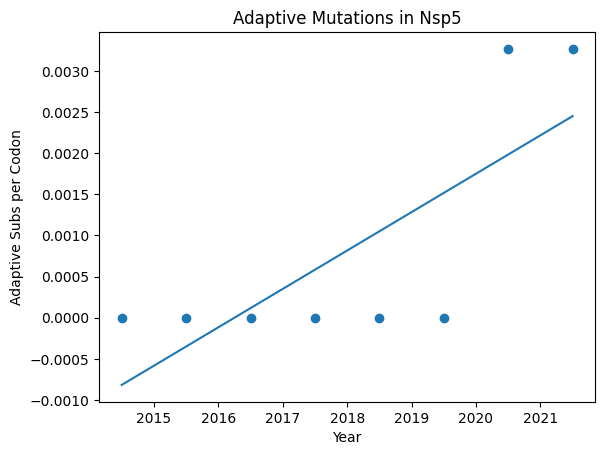

rate: 0.0004668534080298786


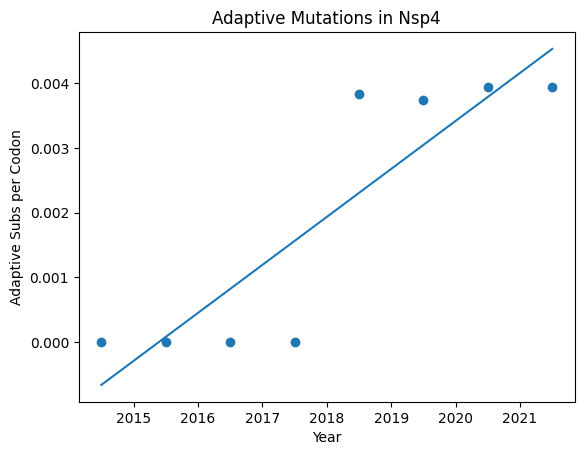

rate: 0.0007427829758805957


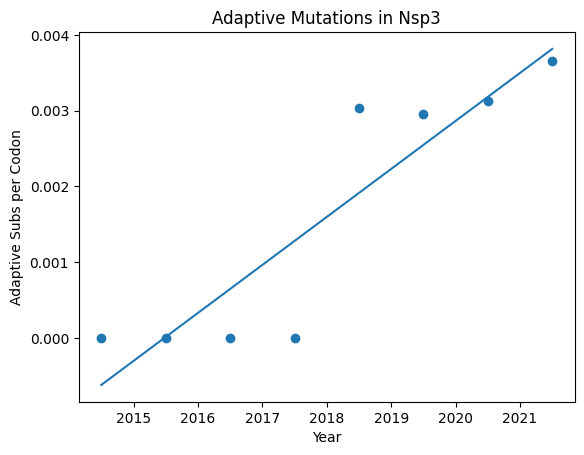

rate: 0.0006331140756675767


In [4]:
for gene in nonzero_genes:
    x, y = collect_data(gene)
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    def line(x):
        return slope * x + intercept

    model = list(map(line, x))

    plt.scatter(x, y)
    plt.plot(x, model)
    plt.title("Adaptive Mutations in " + str(gene))
    plt.xlabel("Year")
    plt.ylabel("Adaptive Subs per Codon")
    plt.show()
    print("rate: " + str(slope))